## Feature Selection_Prophet
## Table of Contents:
* [0. Importing dependencies](#dependencies)
* [1. Feature extraction by Prophet](#1.0)
* [2. Feature importance](#2.0)
  * [2.1 Mutual information](#2.1)
  * [2.2 XGBoost](#2.2)


  


# 0. Importing dependencies  <a class="anchor" id="dependencies"></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
!pip install prophet
from prophet import Prophet
! pip install --upgrade holidays
from prophet.plot import plot_components
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
# Load dataframes
file_path = '/content/gdrive/My Drive/df_merged_m.csv'
df_merged_m = pd.read_csv(file_path)

# 1. Feature extraction by Prophet  <a class="anchor" id="1.0"></a>

In [ ]:
# Fit model for videoConsumption
model_vc = Prophet()
model_vc.add_country_holidays(country_name='TR')

# model_vc.add_seasonality(name='weekly', period=10080, fourier_order=5)  # Weekly seasonality
# model_vc.add_seasonality(name='monthly', period=43920, fourier_order=3)  # Monthly seasonality
# model_vc.add_seasonality(name='yearly', period=525960, fourier_order=2) # Yearly seasonality

model_vc.add_regressor('impression')
# model_vc.add_regressor('uniqueDevice')

model_vc.fit(df_merged_m[['datetime', 'videoConsumption', 'impression', 'uniqueDevice']].rename(columns={'videoConsumption': 'y', 'datetime': 'ds'}))

DEBUG:cmdstanpy:input tempfile: /tmp/tmpi8_sjb0d/2dcvwsya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi8_sjb0d/v69webt8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88656', 'data', 'file=/tmp/tmpi8_sjb0d/2dcvwsya.json', 'init=/tmp/tmpi8_sjb0d/v69webt8.json', 'output', 'file=/tmp/tmpi8_sjb0d/prophet_modelw3aqofwm/prophet_model-20240519232803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:28:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:47:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Fit model for impression
model_i = Prophet()
model_i.add_country_holidays(country_name='TR')

# model_i.add_seasonality(name='weekly', period=10080, fourier_order=5)  # Weekly seasonality
# model_i.add_seasonality(name='monthly', period=43920, fourier_order=3)  # Monthly seasonality
# model_i.add_seasonality(name='yearly', period=525960, fourier_order=2) # Yearly seasonality

model_i.add_regressor('videoConsumption')
# model_i.add_regressor('uniqueDevice')
model_i.fit(df_merged_m[['datetime', 'impression', 'videoConsumption', 'uniqueDevice']].rename(columns={'impression': 'y', 'datetime': 'ds'}))

DEBUG:cmdstanpy:input tempfile: /tmp/tmpi8_sjb0d/fqtq7nke.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi8_sjb0d/o7j2vl_k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92661', 'data', 'file=/tmp/tmpi8_sjb0d/fqtq7nke.json', 'init=/tmp/tmpi8_sjb0d/o7j2vl_k.json', 'output', 'file=/tmp/tmpi8_sjb0d/prophet_modelidg1ez0i/prophet_model-20240519235036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:50:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:07:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Fit model for uniqueDevice
model_ud = Prophet()
model_ud.add_country_holidays(country_name='TR')

# model_ud.add_seasonality(name='weekly', period=10080, fourier_order=5)  # Weekly seasonality
# model_ud.add_seasonality(name='monthly', period=43920, fourier_order=3)  # Monthly seasonality
# model_ud.add_seasonality(name='yearly', period=525960, fourier_order=2) # Yearly seasonality

model_ud.fit(df_merged_m[['datetime', 'uniqueDevice']].rename(columns={'uniqueDevice': 'y', 'datetime': 'ds'}))

DEBUG:cmdstanpy:input tempfile: /tmp/tmpi8_sjb0d/3lsnt4pp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi8_sjb0d/nu_1t4jd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43185', 'data', 'file=/tmp/tmpi8_sjb0d/3lsnt4pp.json', 'init=/tmp/tmpi8_sjb0d/nu_1t4jd.json', 'output', 'file=/tmp/tmpi8_sjb0d/prophet_modeljqbiisvr/prophet_model-20240520000951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:09:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:08:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Meke predictions

# Prediction for videoConsumption
future_vc = df_merged_m[['datetime', 'impression', 'uniqueDevice']].copy()
future_vc.rename(columns={'datetime': 'ds'}, inplace=True)

forecast_vc = model_vc.predict(future_vc)

In [ ]:
# Prediction for impression
future_i = df_merged_m[['datetime', 'videoConsumption', 'uniqueDevice']].copy()
future_i.rename(columns={'datetime': 'ds'}, inplace=True)

forecast_i = model_i.predict(future_i)

In [ ]:
# Prediction for uniqueDevice
future_ud = df_merged_m[['datetime', 'uniqueDevice']].copy()
future_ud.rename(columns={'datetime': 'ds'}, inplace=True)

forecast_ud = model_ud.predict(future_ud)

In [ ]:
# Merge features
features = forecast_vc[['ds', 'trend', 'yearly', 'weekly']].merge(
    forecast_i[['ds', 'trend', 'yearly', 'weekly']], on='ds', suffixes=('_vc', '_i'))

features = features.merge(
    forecast_ud[['ds', 'trend', 'yearly', 'weekly']], on='ds', suffixes=('', '_ud')
).rename(columns={
    'trend': 'trend_ud',
    'yearly': 'yearly_ud',
    'weekly': 'weekly_ud'
})

features.rename(columns={'ds': 'datetime'}, inplace=True)

print(features.head())

             datetime      trend_vc     yearly_vc    weekly_vc      trend_i  \
0 2021-01-01 00:00:00  86348.577306  18087.360657  1924.770568  4125.249416   
1 2021-01-01 00:01:00  86348.169379  18087.158390  1922.873562  4125.244139   
2 2021-01-01 00:02:00  86347.761452  18086.956108  1920.973287  4125.238863   
3 2021-01-01 00:03:00  86347.353526  18086.753811  1919.069746  4125.233586   
4 2021-01-01 00:04:00  86346.945599  18086.551500  1917.162939  4125.228309   

     yearly_i    weekly_i      trend_ud      yearly_ud     weekly_ud  
0  717.659027 -174.974435  1.155635e+06  287805.215463 -27825.806545  
1  717.658051 -175.031817  1.155636e+06  287806.633627 -27840.516083  
2  717.657074 -175.089150  1.155636e+06  287808.051618 -27855.232092  
3  717.656096 -175.146434  1.155636e+06  287809.469437 -27869.954563  
4  717.655119 -175.203668  1.155637e+06  287810.887082 -27884.683482  


In [ ]:
# Save extracted features
path_to_save = '/content/gdrive/My Drive/extracted_features_trend_H.csv'
features.to_csv(path_to_save, index=False)

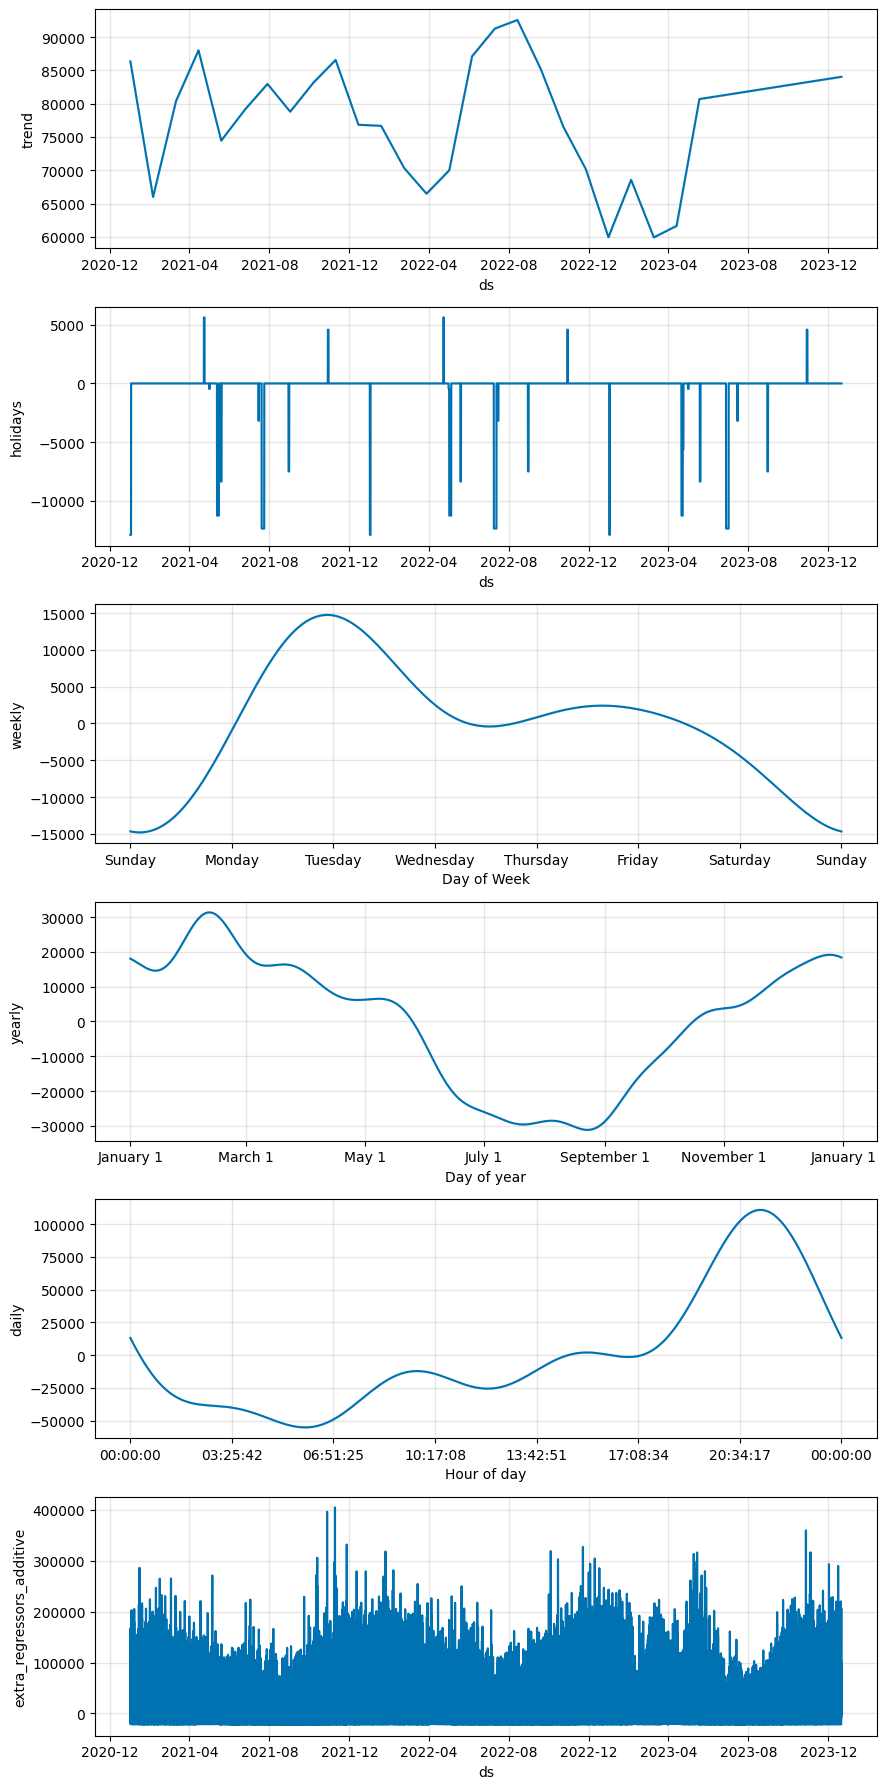

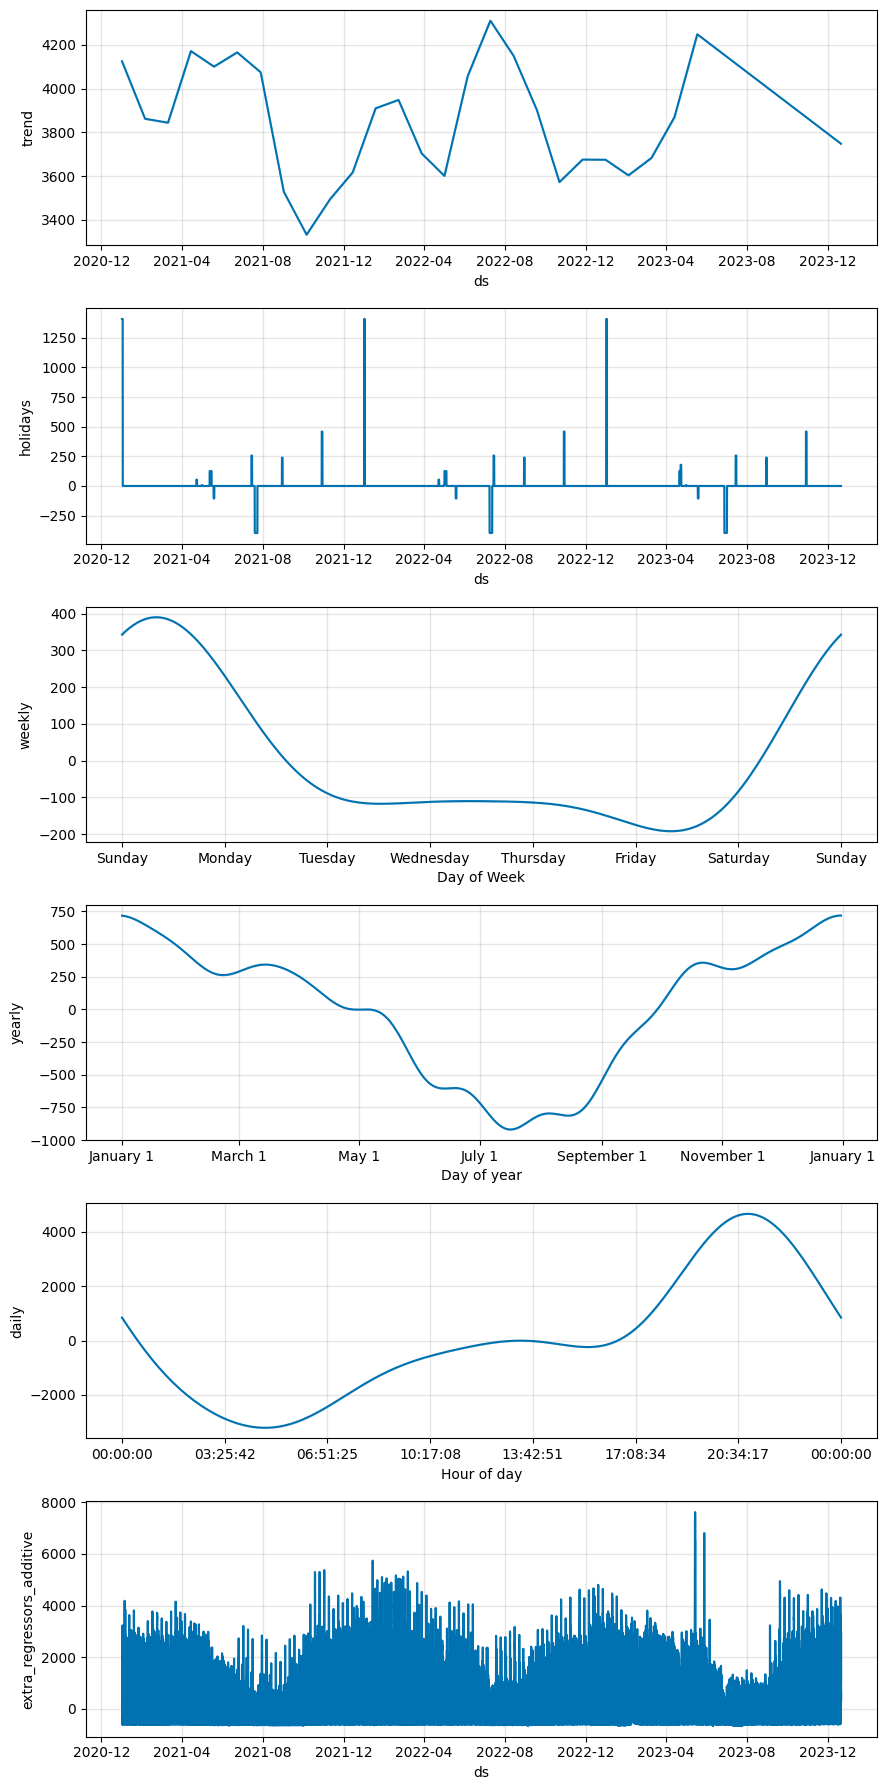

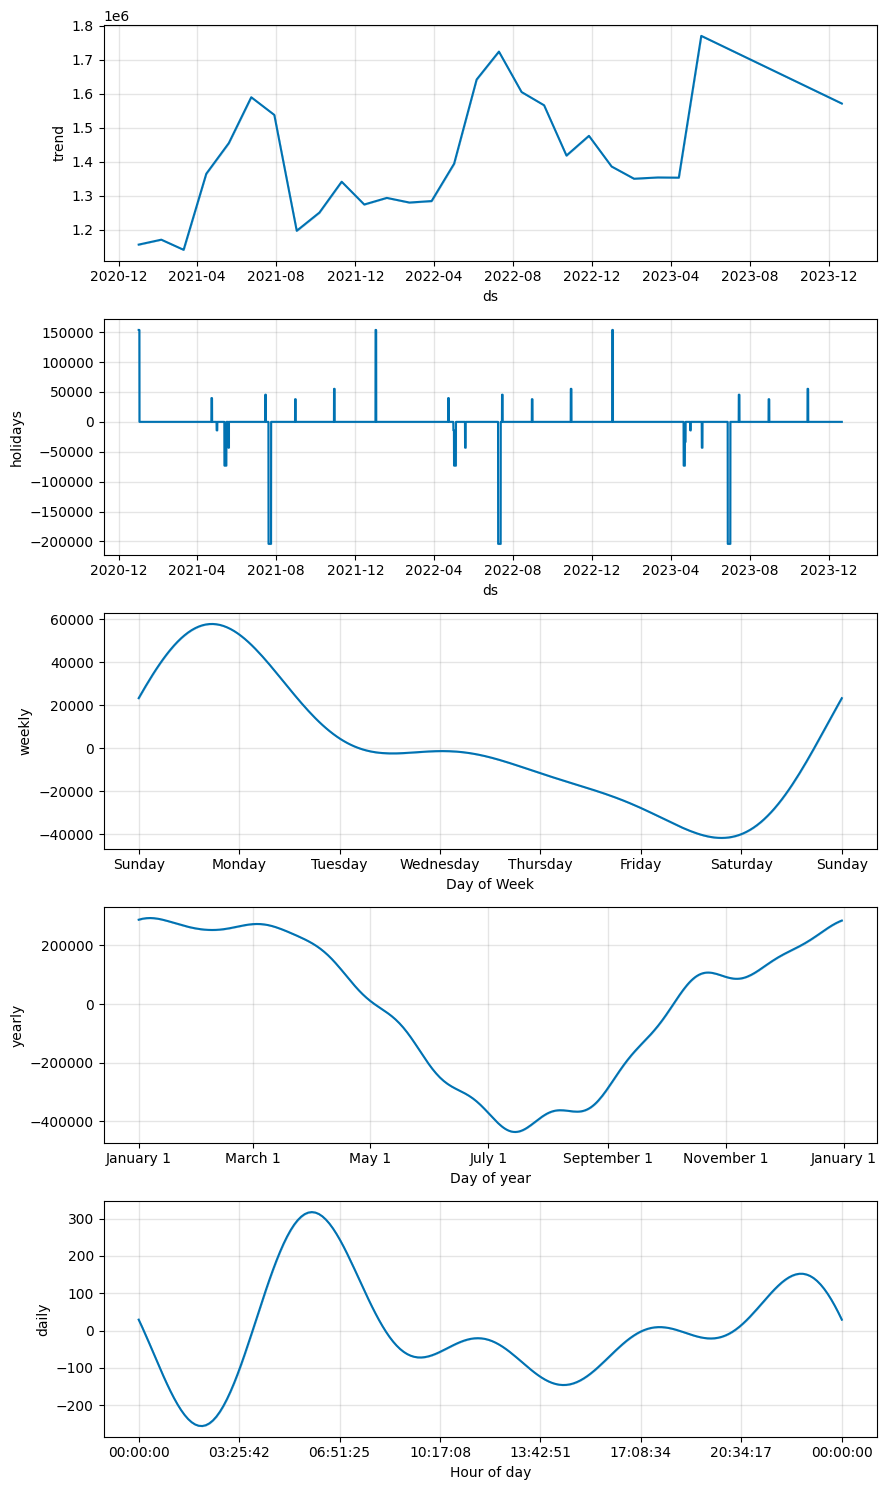

In [ ]:
# Plot feature components for videoConsumption
fig_vc = plot_components(model_vc, forecast_vc)
plt.show()

# Plot feature components for impression
fig_i = plot_components(model_i, forecast_i)
plt.show()

# Plot feature components for uniqueDevice
fig_ud = plot_components(model_ud, forecast_ud)
plt.show()


# 2. Feature importance  <a class="anchor" id="2.0"></a>

# <a id='2.1'></a>
### 2.1 Mutual information

In [ ]:
# Merge target variables with extracted features

# Load features
file_path = '/content/gdrive/My Drive/extracted_features_trend_H.csv'
df_features = pd.read_csv(file_path)

# Merge with df_merged_m
df_features.set_index('datetime', inplace=True)
df_merged_m.set_index('datetime', inplace=True)
df_final = df_features.join(df_merged_m[['videoConsumption', 'impression']], how='left')

df_final.head()

,trend_vc,yearly_vc,weekly_vc,trend_i,yearly_i,weekly_i,trend_ud,yearly_ud,weekly_ud,videoConsumption,impression
datetime,,,,,,,,,,,
2021-01-01 00:00:00,86348.577306,18087.360657,1924.770568,4125.249416,717.659027,-174.974435,1.155635e+06,287805.215463,-27825.806545,36471,27428
2021-01-01 00:01:00,86348.169379,18087.158390,1922.873562,4125.244139,717.658051,-175.031817,1.155636e+06,287806.633627,-27840.516083,35068,32679
2021-01-01 00:02:00,86347.761452,18086.956108,1920.973287,4125.238863,717.657074,-175.089150,1.155636e+06,287808.051618,-27855.232092,45013,18458
2021-01-01 00:03:00,86347.353526,18086.753811,1919.069746,4125.233586,717.656096,-175.146434,1.155636e+06,287809.469437,-27869.954563,46461,12803
2021-01-01 00:04:00,86346.945599,18086.551500,1917.162939,4125.228309,717.655119,-175.203668,1.155637e+06,287810.887082,-27884.683482,46617,12697


In [ ]:
print(df_final.isnull().sum())

trend_vc            0
yearly_vc           0
weekly_vc           0
trend_i             0
yearly_i            0
weekly_i            0
trend_ud            0
yearly_ud           0
weekly_ud           0
videoConsumption    0
impression          0
dtype: int64


In [ ]:
# Save the final dataframe
path_to_save = '/content/gdrive/My Drive/df_final.csv'
df_final.to_csv(path_to_save, index=False)

In [3]:
# Load the final dataframe
file_path = '/content/gdrive/My Drive/df_final.csv'
df_final = pd.read_csv(file_path)

1. Captures Nonlinear Relationships

Mutual Information can capture complex nonlinear relationships, not just linear ones. This is particularly important for time series data where the relationships between features and target variables are often complex and nonlinear.

2. Distribution-Agnostic

Mutual Information does not assume any specific distribution of the data, making it effective for handling non-normally distributed data. Since your time series data may not follow a normal distribution, using mutual information can provide a more accurate assessment of feature importance.

3. Insensitivity to Outliers

Mutual Information is not sensitive to outliers, meaning it can provide reliable feature importance assessments even when dealing with noisy or outlier-prone data.


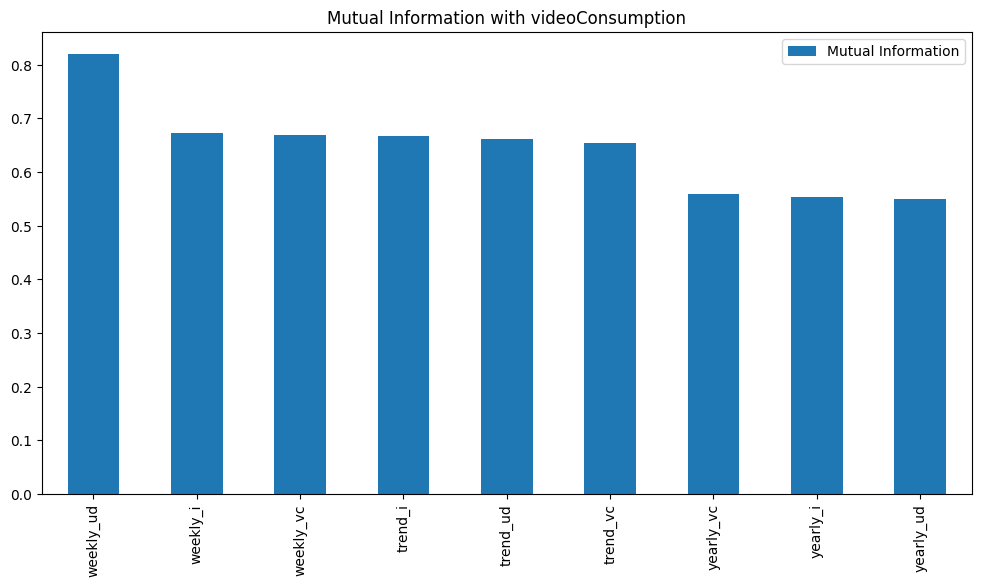

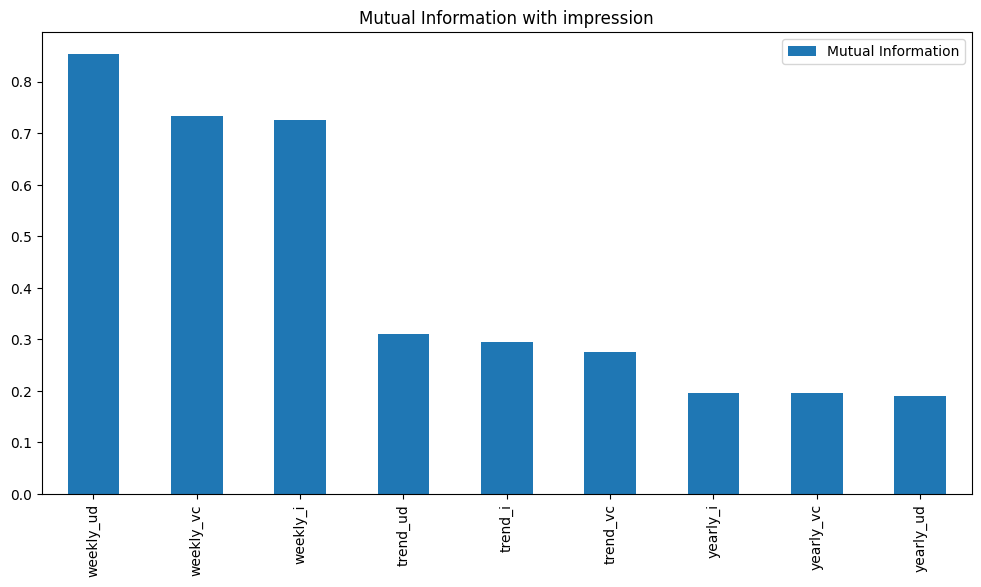

In [7]:
# Calculate mutual information
X = df_final.drop(['videoConsumption', 'impression'], axis=1)
y_vc = df_final['videoConsumption']
y_i = df_final['impression']

mi_vc = mutual_info_regression(X, y_vc)
mi_i = mutual_info_regression(X, y_i)

# Consolidate results into dataframe
mi_vc_df = pd.DataFrame(mi_vc, index=X.columns, columns=['Mutual Information'])
mi_i_df = pd.DataFrame(mi_i, index=X.columns, columns=['Mutual Information'])

# Visualization
mi_vc_df.sort_values(by='Mutual Information', ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Mutual Information with videoConsumption')
plt.show()

mi_i_df.sort_values(by='Mutual Information', ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Mutual Information with impression')
plt.show()

# <a id='2.2'></a>
### 2.2 XGBoost

In [ ]:
# Use StandardScaler to remove the mean and scale the data to unit variance so that for each feature
# the mean will be close to 0 and the standard deviation will be 1.
X = df_final.drop(['videoConsumption', 'impression'], axis=1)
y = df_final[['videoConsumption', 'impression']]

# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Hyperparameter tuning
params = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 0.9]
}

In [ ]:
# For videoConsumption
model_vc = xgb.XGBRegressor(objective='reg:squarederror')
grid_search_vc = GridSearchCV(model_vc, params, scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_search_vc.fit(X_train_scaled, y_train['videoConsumption'])
model_vc = grid_search_vc.best_estimator_
print('Best hyperparameters for videoConsumption:', grid_search_vc.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best hyperparameters for videoConsumption: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.9}


In [ ]:
# For impression
model_i = xgb.XGBRegressor(objective='reg:squarederror')
grid_search_i = GridSearchCV(model_i, params, scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_search_i.fit(X_train_scaled, y_train['impression'])
model_i = grid_search_i.best_estimator_
print('Best hyperparameters for impression:', grid_search_i.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best hyperparameters for impression: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.9}


In [ ]:
# Evaluate models

# Predictions for videoConsumption
predictions_vc = model_vc.predict(X_test_scaled)
mse_vc = mean_squared_error(y_test['videoConsumption'], predictions_vc)
rmse_vc = mse_vc ** 0.5  # Calculate RMSE
percentage_rmse_vc = (rmse_vc / y_test['videoConsumption'].mean()) * 100
print("Test RMSE for videoConsumption: ", rmse_vc)
print("Test RMSE percentage for videoConsumption relative to the mean: {:.2f}%".format(percentage_rmse_vc))

# Predictions for impression
predictions_i = model_i.predict(X_test_scaled)
mse_i = mean_squared_error(y_test['impression'], predictions_i)
rmse_i = mse_i ** 0.5  # Calculate RMSE
percentage_rmse_i = (rmse_i / y_test['impression'].mean()) * 100
print("Test RMSE for impression: ", rmse_i)
print("Test RMSE percentage for impression relative to the mean: {:.2f}%".format(percentage_rmse_i))

Test RMSE for videoConsumption:  13066.08420957631
Test RMSE percentage for videoConsumption relative to the mean: 16.85%
Test RMSE for impression:  1510.6902214992451
Test RMSE percentage for impression relative to the mean: 38.98%


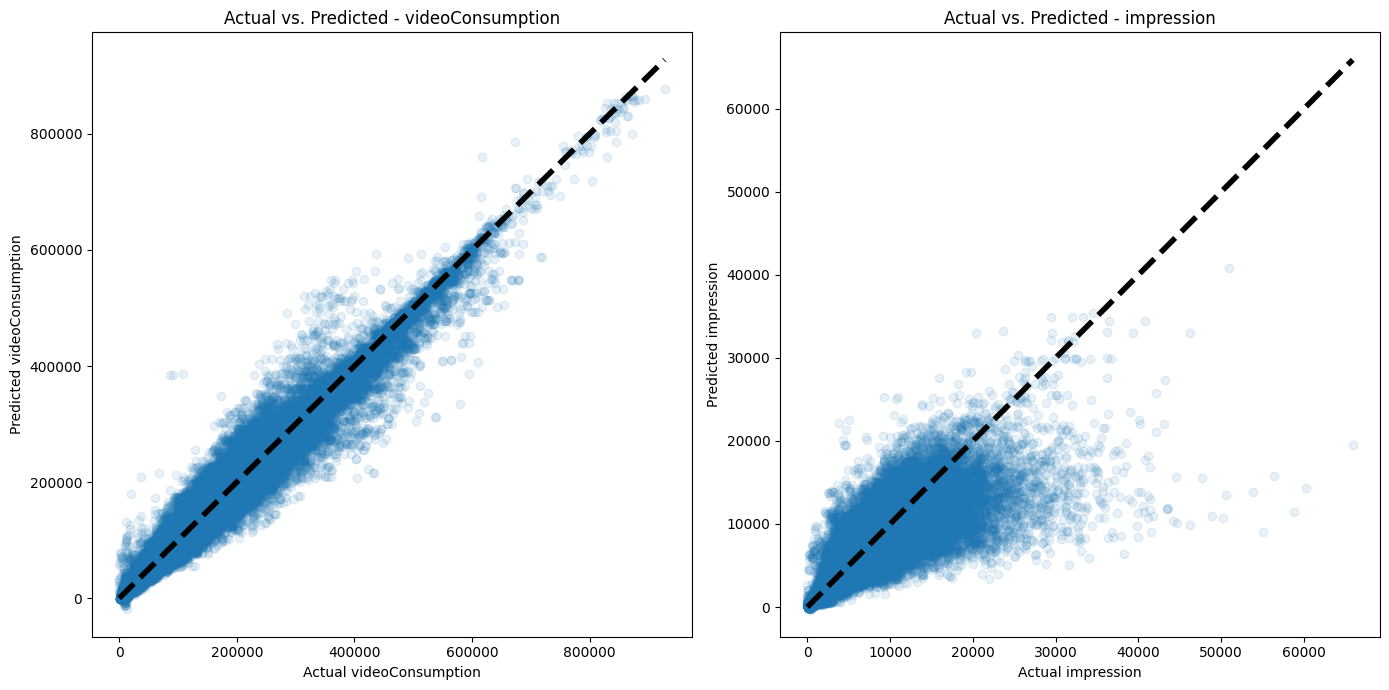

In [ ]:
# Plot predictions for videoConsumption
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(y_test['videoConsumption'], predictions_vc, alpha=0.1) # The alpha parameter controls the transparency of the points.
plt.plot([y_test['videoConsumption'].min(), y_test['videoConsumption'].max()], [y_test['videoConsumption'].min(), y_test['videoConsumption'].max()], 'k--', lw=4)
plt.xlabel('Actual videoConsumption')
plt.ylabel('Predicted videoConsumption')
plt.title('Actual vs. Predicted - videoConsumption')

# Plot predictions for impression
plt.subplot(1, 2, 2)
plt.scatter(y_test['impression'], predictions_i, alpha=0.1)  # The alpha parameter controls the transparency of the points.
plt.plot([y_test['impression'].min(), y_test['impression'].max()], [y_test['impression'].min(), y_test['impression'].max()], 'k--', lw=4)
plt.xlabel('Actual impression')
plt.ylabel('Predicted impression')
plt.title('Actual vs. Predicted - impression')

plt.tight_layout()
plt.show()

 The actual values  are on the x-axis and the predicted are values on the y-axis.

 The dashed black line that represents the "perfect prediction" line. It stretches from the minimum to the maximum of the actual values on both axes. Points that lie on this line represent predictions that are exactly equal to the actual values.

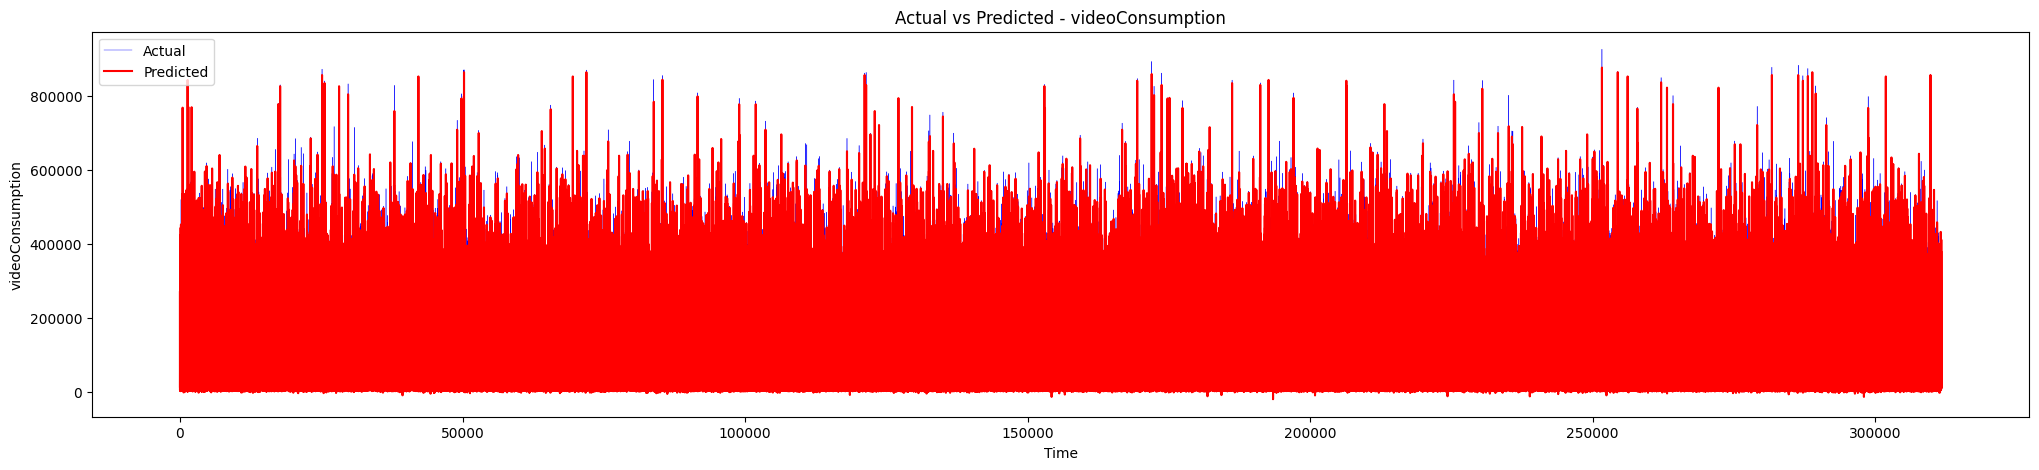

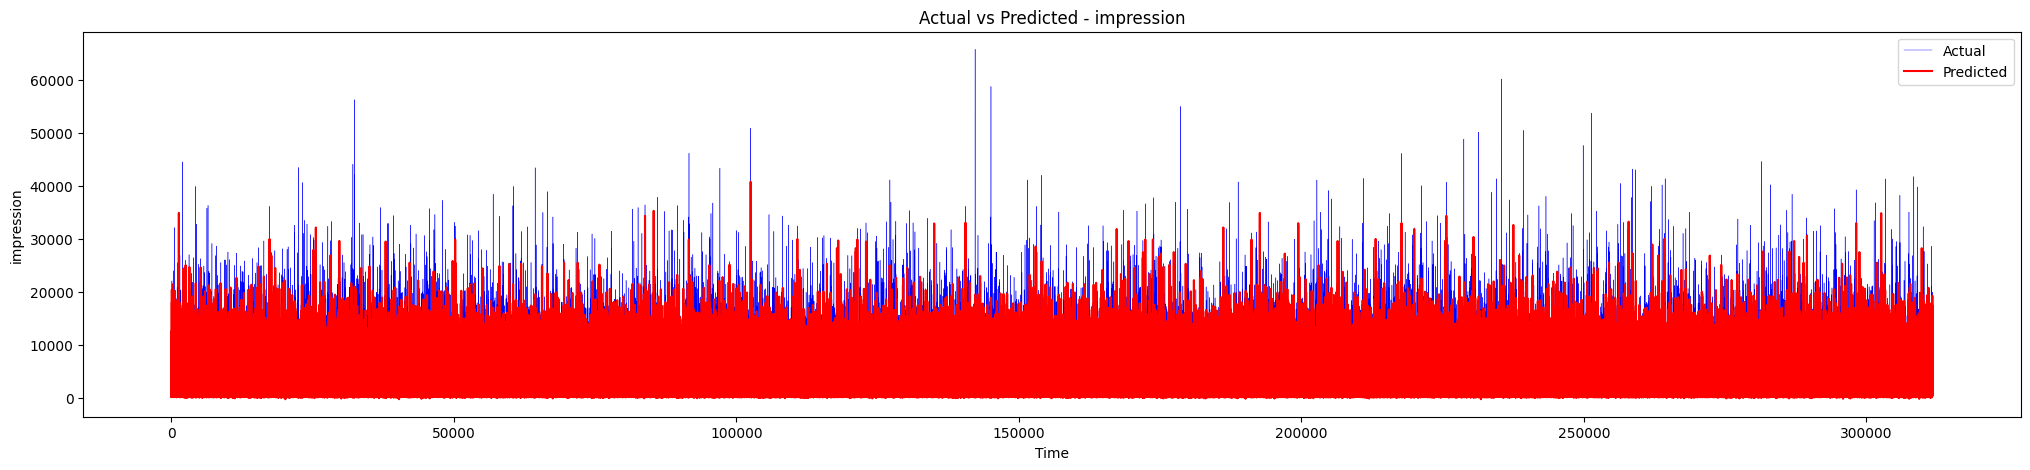

In [ ]:
# Plot for videoConsumption
plt.figure(figsize=(25, 5))
plt.plot(y_test['videoConsumption'].values, label='Actual', color='blue', linewidth=0.3)
plt.plot(predictions_vc, label='Predicted', color='red')
plt.title('Actual vs Predicted - videoConsumption')
plt.xlabel('Time')
plt.ylabel('videoConsumption')
plt.legend()
plt.show()

# Plot for impression
plt.figure(figsize=(25, 5))
plt.plot(y_test['impression'].values, label='Actual', color='blue', linewidth=0.3)
plt.plot(predictions_i, label='Predicted', color='red')
plt.title('Actual vs Predicted - impression')
plt.xlabel('Time')
plt.ylabel('impression')
plt.legend()
plt.show()

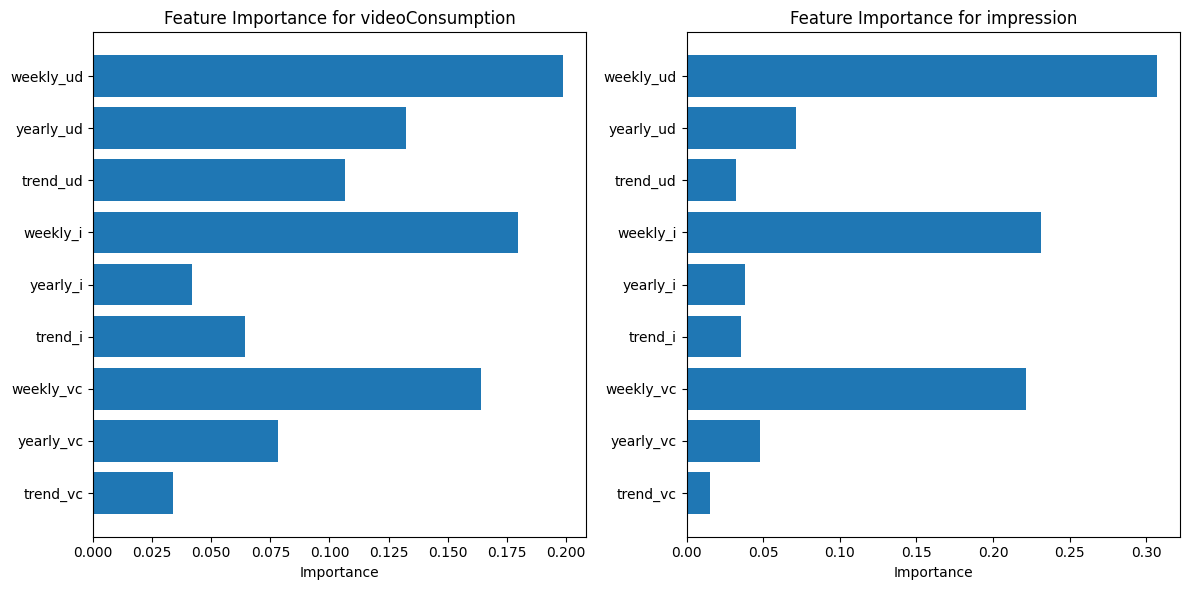

In [ ]:
# Obtain feature importance
importance_vc = model_vc.feature_importances_
importance_i = model_i.feature_importances_

# Plot feature importance for videoConsumption
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.barh(X.columns, importance_vc)
plt.title('Feature Importance for videoConsumption')
plt.xlabel('Importance')

# Plot feature importance for impression
plt.subplot(122)
plt.barh(X.columns, importance_i)
plt.title('Feature Importance for impression')
plt.xlabel('Importance')

plt.tight_layout()
plt.show()